In [75]:
import pandas as pd
from logic.processing import load_data
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from langdetect import detect, DetectorFactory

## Load Data

In [11]:
data = load_data('drugsComTrain_raw.csv')

In [12]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [13]:
data['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

## Length reviews distribution 

In [21]:
len(data['review'].values)

161297

In [22]:
data['length'] = data['review'].apply(len)

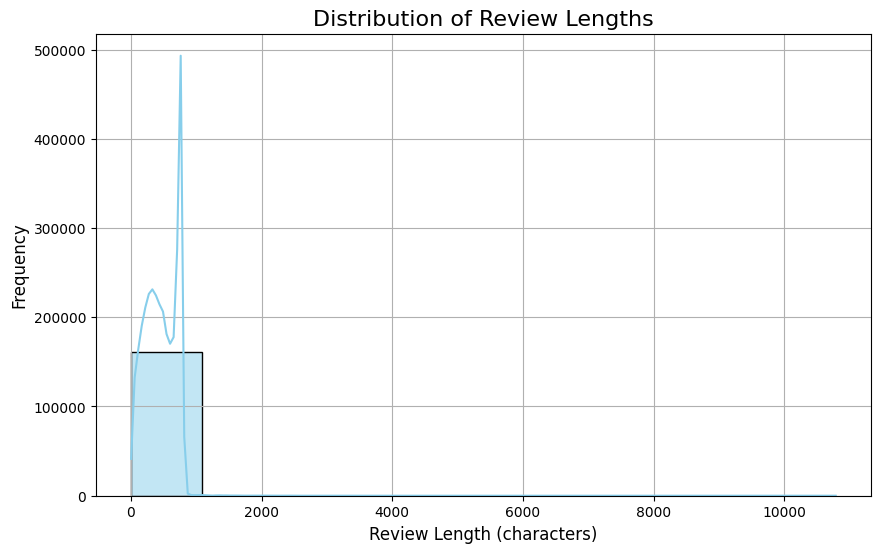

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data["length"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Review Lengths", fontsize=16)
plt.xlabel("Review Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

## Rating distribution

In [50]:
rating_counts = data["rating"].value_counts().sort_index()

<Axes: xlabel='rating'>

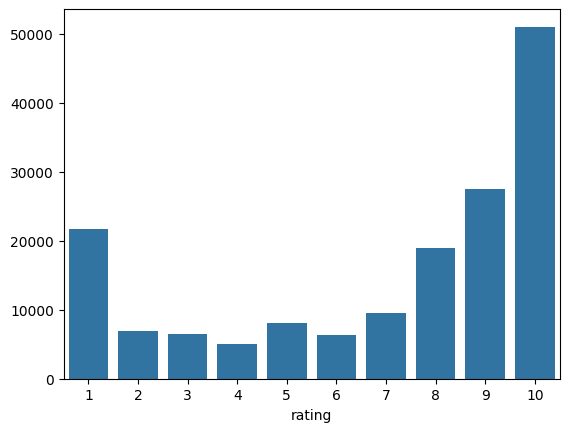

In [51]:
sns.barplot(x=rating_counts.index, y=rating_counts.values)

In [56]:
rating_percentage = data["rating"].value_counts()/data.shape[0] *100

In [58]:
rating_percentage.sort_index()

rating
1     13.403225
2      4.297042
3      4.037893
4      3.107311
5      4.967854
6      3.932497
7      5.862477
8     11.711315
9     17.068513
10    31.611871
Name: count, dtype: float64

## Empty reviews

In [61]:
len(data[data['length']==0])

0

## Wordcloud

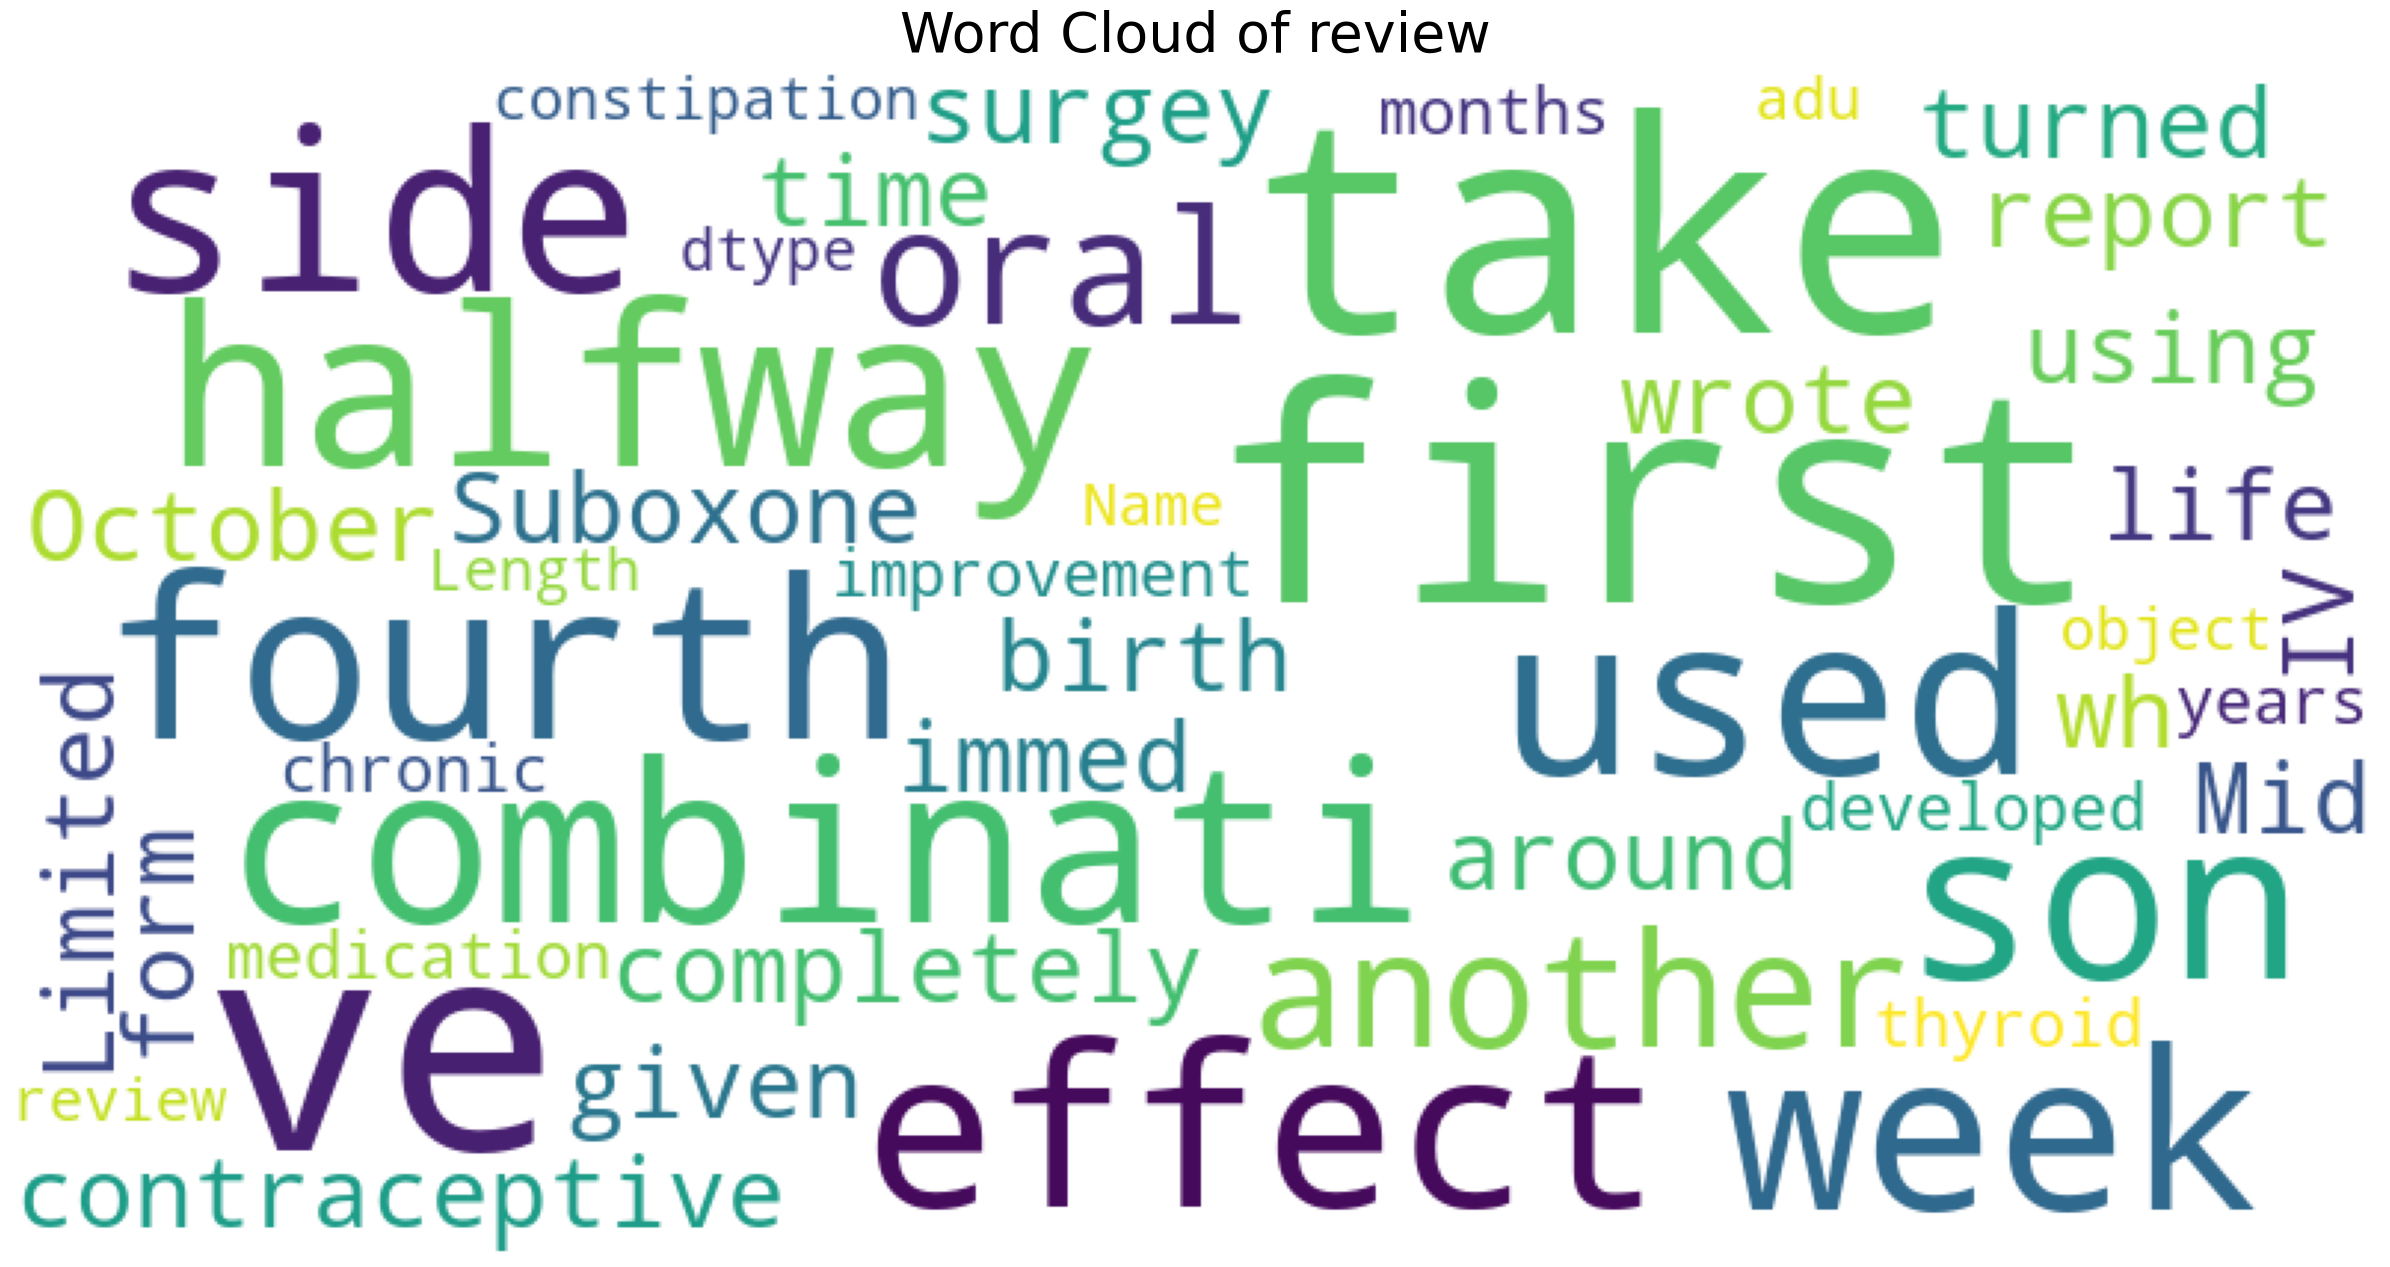

In [65]:

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(data["review"], title="Word Cloud of review")

In [66]:
data_low_rating = data[data['rating']<6]
data_high_rating = data[data['rating']>5]

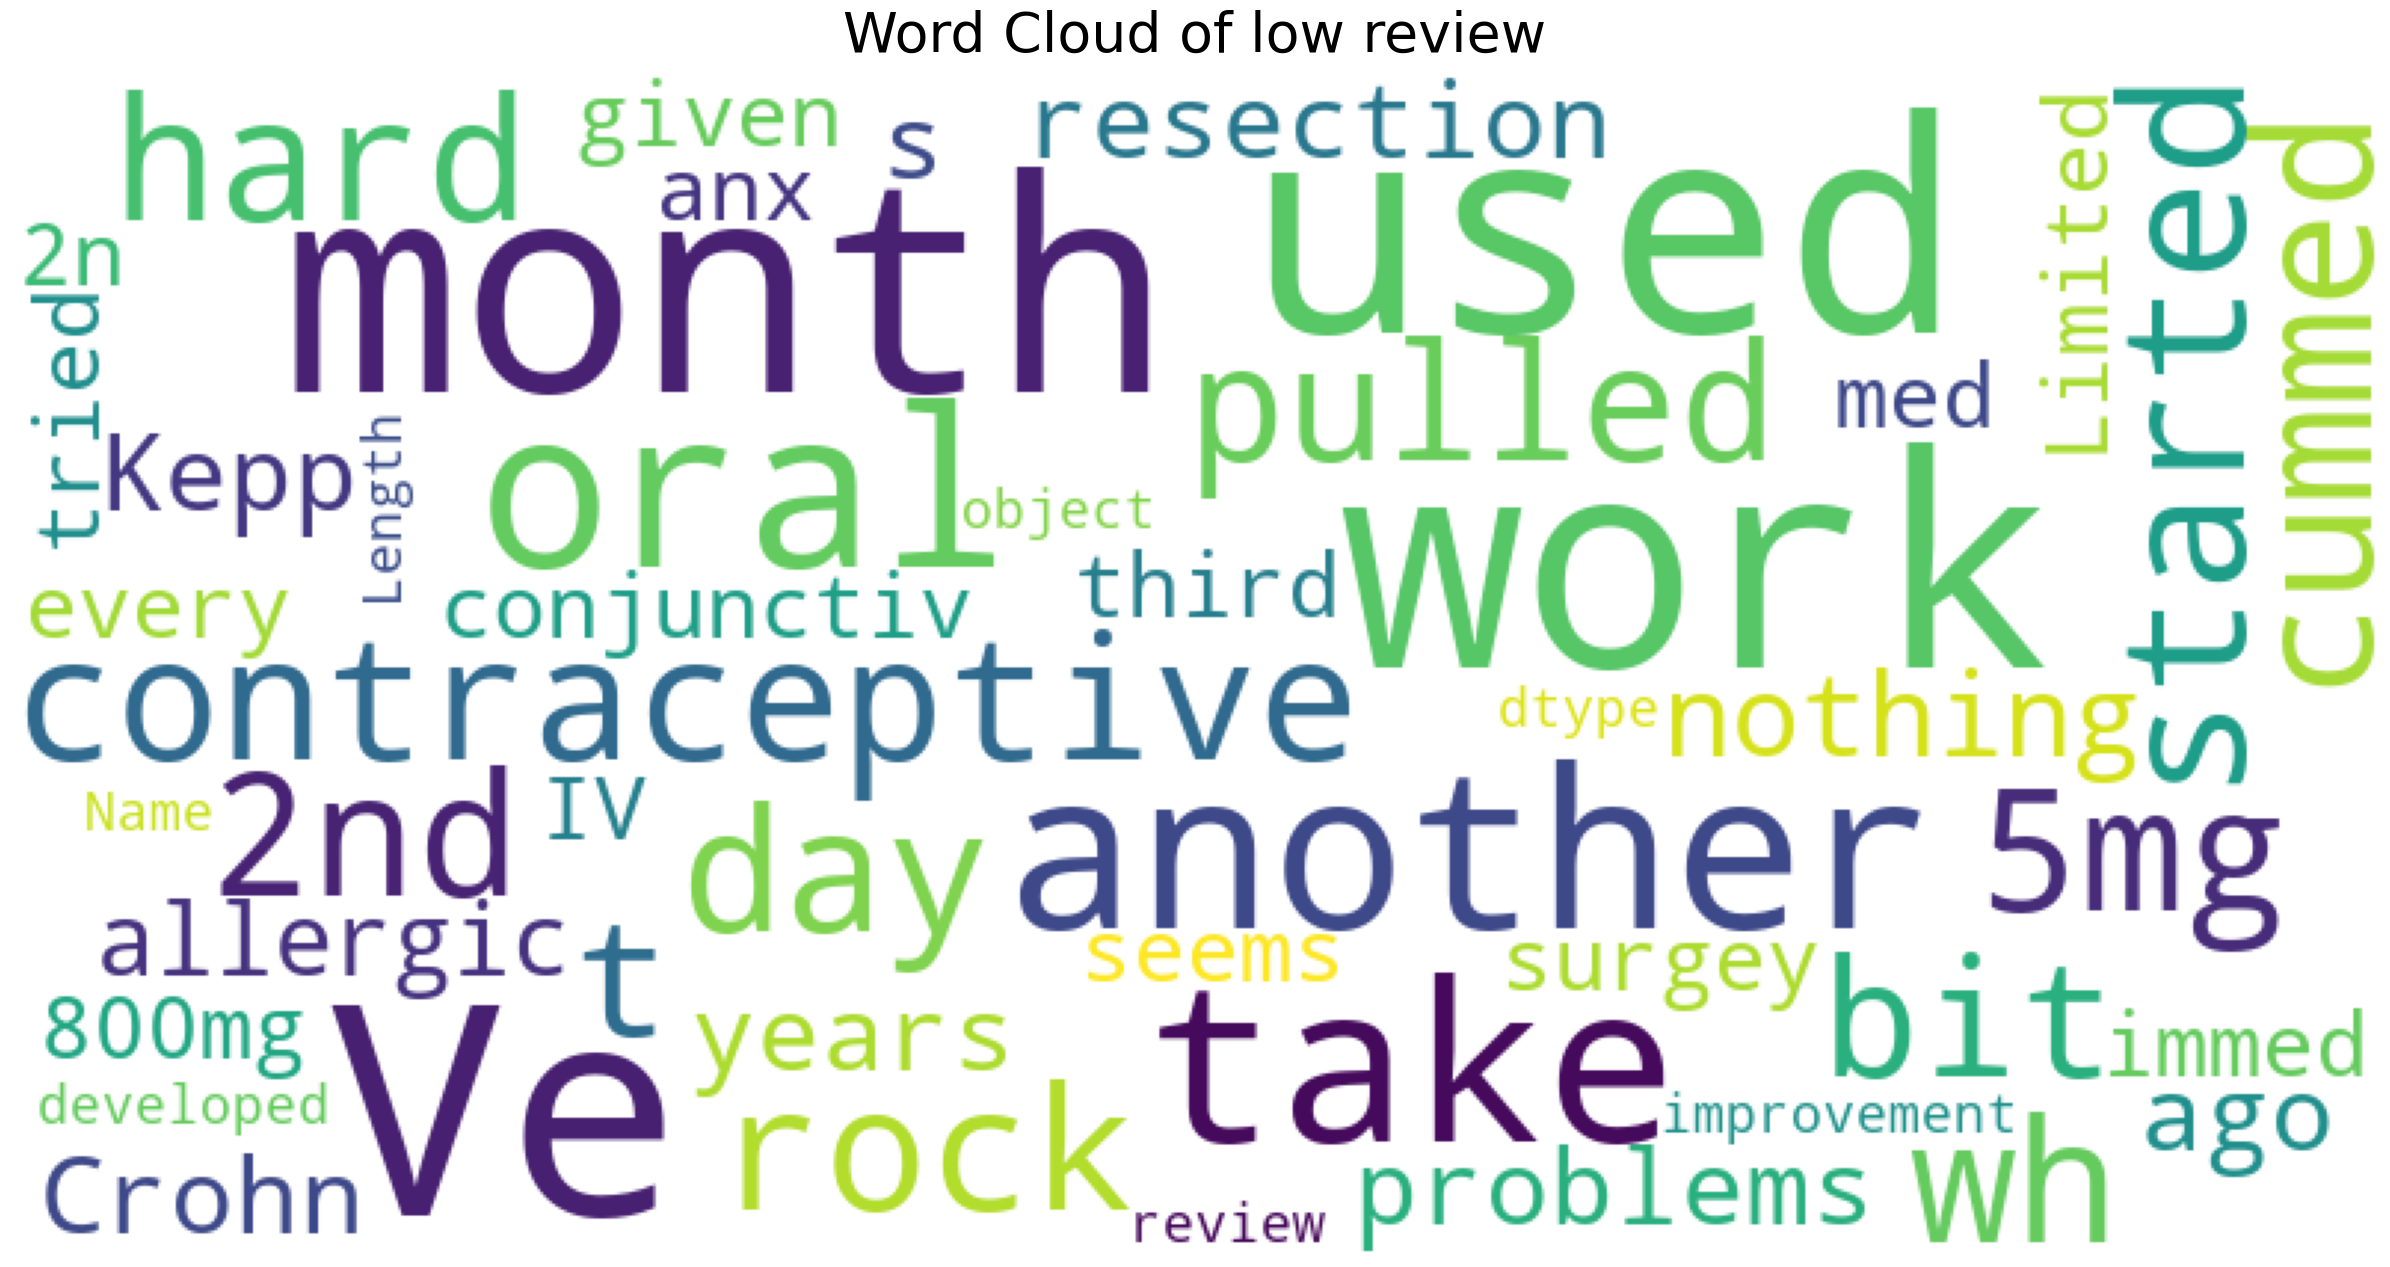

In [68]:
plot_wordcloud(data_low_rating['review'], title="Word Cloud of low review")

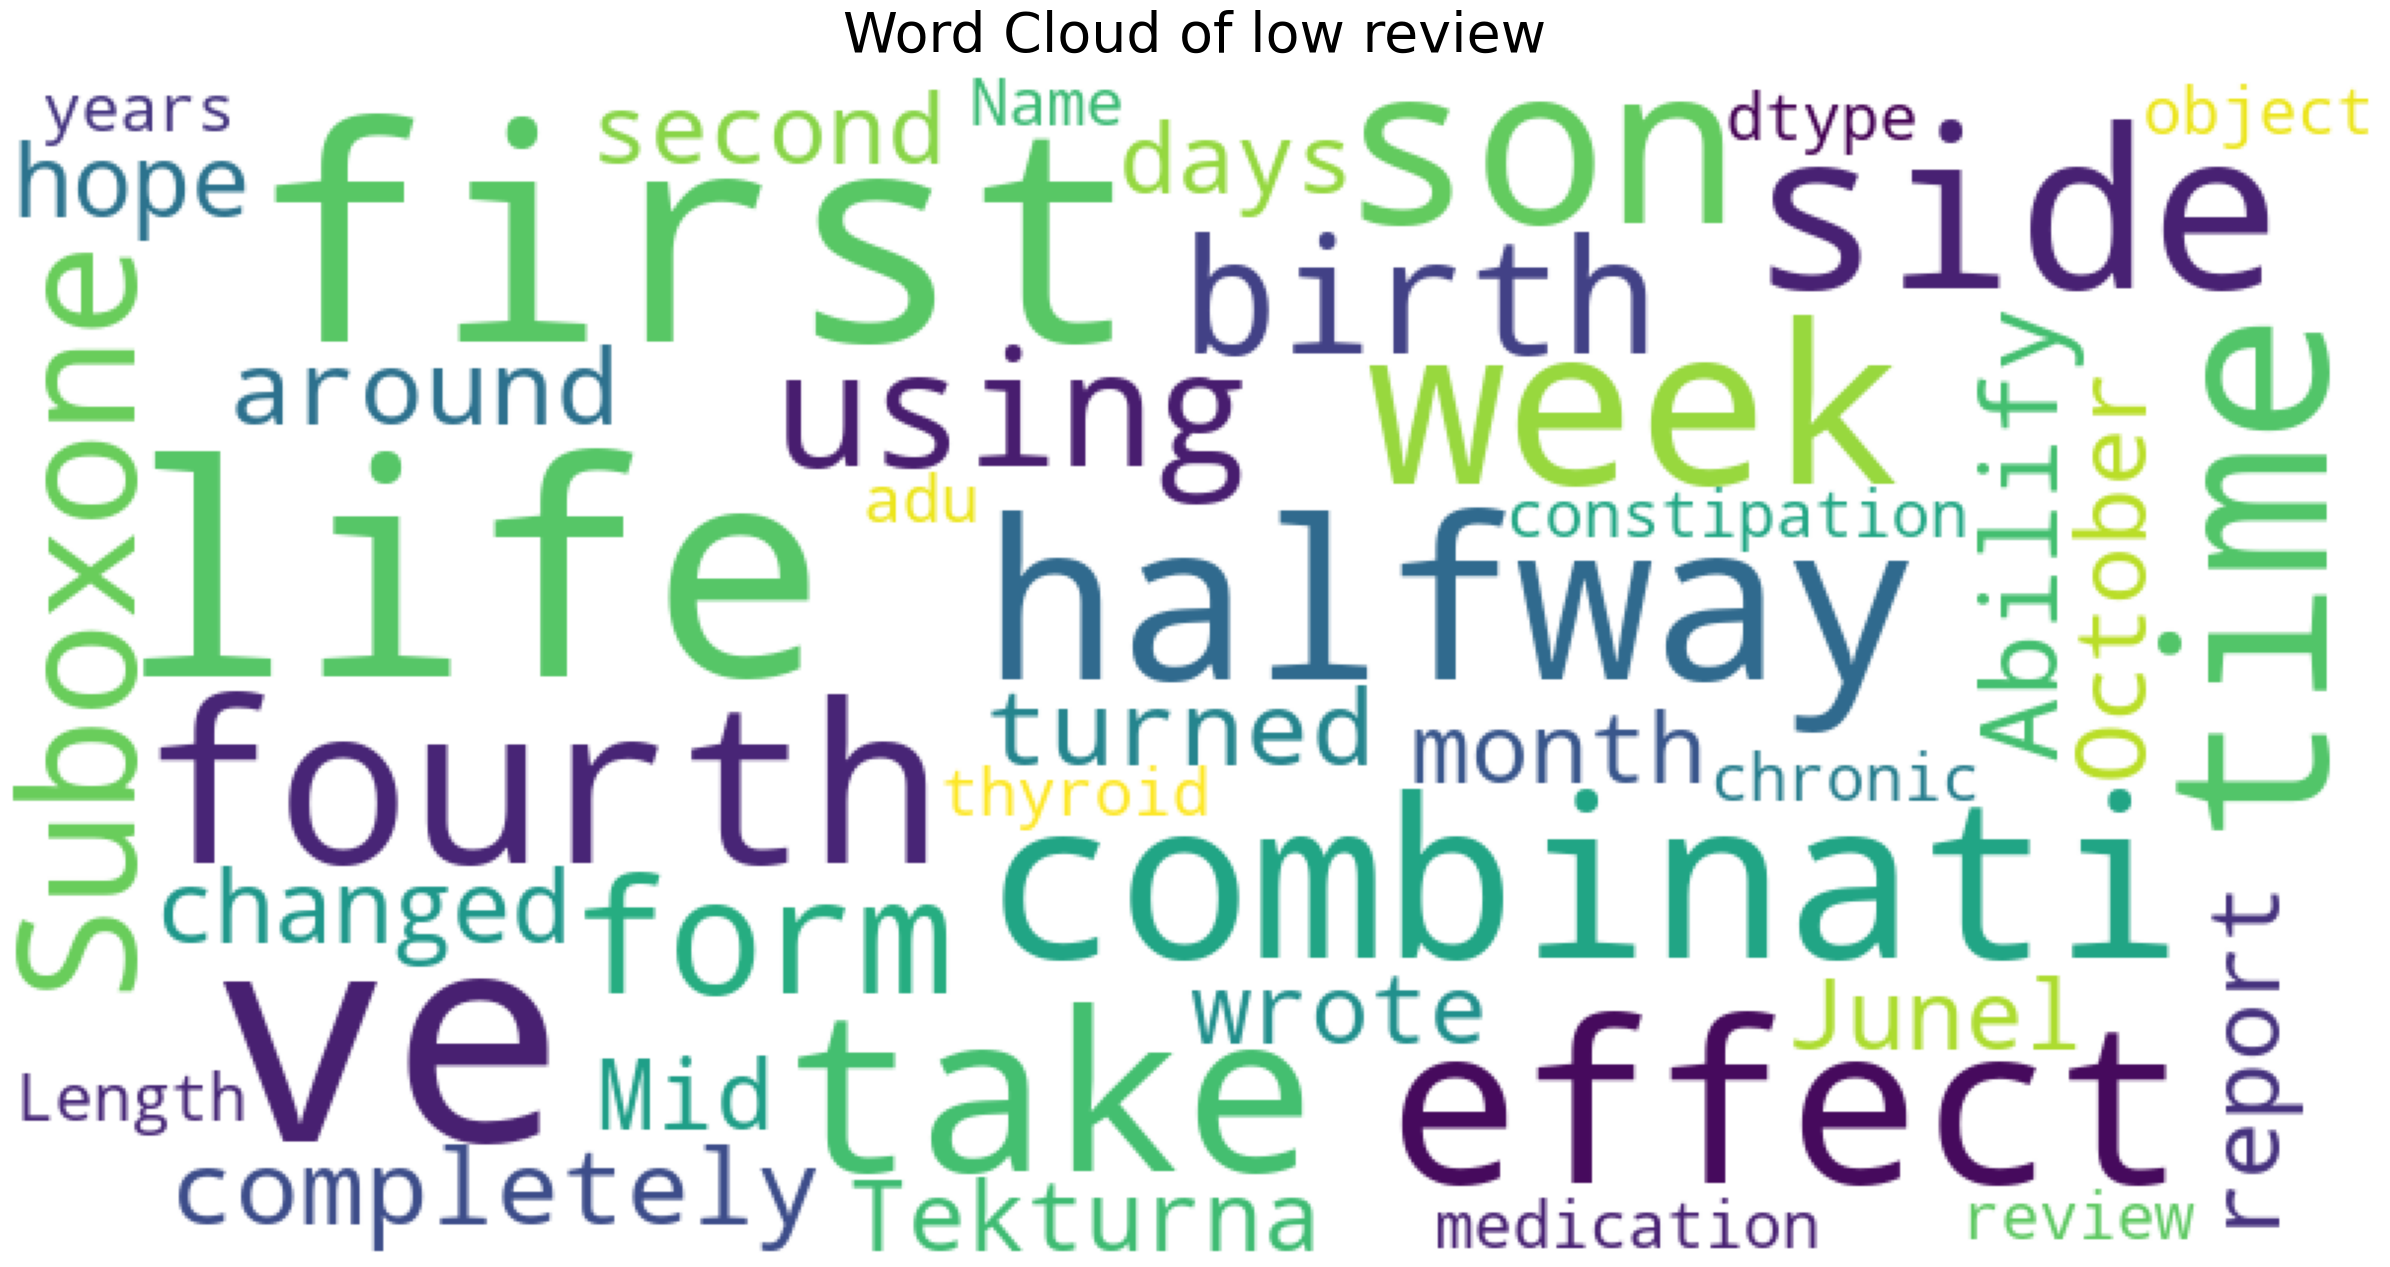

In [69]:
plot_wordcloud(data_high_rating['review'], title="Word Cloud of low review")

## UsefulCount

In [71]:
data["usefulCount"].describe()

count    161297.000000
mean         28.004755
std          36.403742
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [74]:
data.groupby('rating')['usefulCount'].mean()

rating
1     15.688468
2     16.342952
3     16.035928
4     16.511572
5     17.480719
6     19.910925
7     23.233926
8     29.155903
9     33.577785
10    37.580459
Name: usefulCount, dtype: float64

## Detect langage

In [76]:
DetectorFactory.seed = 0

In [77]:
def detect_language(review):
    try:
        return detect(review)
    except:
        return "unknown"


In [78]:
data["language"] = data["review"].apply(detect_language)

In [93]:
data["language"].value_counts()

language
en         160498
af            232
so             81
ca             57
da             53
no             48
nl             45
ro             42
it             41
fr             34
de             27
cy             23
tl             21
et             19
pt             12
hr             10
sw             10
id              7
fi              6
sl              5
sq              5
pl              5
cs              4
sv              4
hu              2
unknown         2
es              2
tr              1
sk              1
Name: count, dtype: int64

In [94]:
data[data['language']!='en']

,uniqueID,drugName,condition,review,rating,date,usefulCount,length,language
1112,55821,Effexor,Bipolar Disorde,"""Great miracle.""",10,15-Apr-13,21,16,ro
1285,173419,Phenylephrine,Nasal Congestion,"""Absolute BEST """,10,20-Nov-16,0,16,ro
1488,162277,Hyaluronan,Osteoarthritis,"""Pain in joints,,nausea,abd. Pain""",1,7-Nov-16,4,34,fi
1830,204959,Toradol,Pain,"""IV Excellent 5 Star*****\r\r\nOral 3 Star ***""",10,20-Sep-15,13,44,de
1914,53602,Alesse,Birth Control,"""Awesome""",10,23-Nov-15,0,9,af
...,...,...,...,...,...,...,...,...,...
160193,150061,Acthar,Sarcoidosis,"""amazing medication""",10,8-Nov-17,0,20,it
160205,163002,Nizoral A-D,Seborrheic Dermatitis,"""Did not work at all. """,1,2-Dec-09,16,23,af
160703,167070,Levonorgestrel,Emergency Contraception,"""it worked!""",10,1-Jun-16,1,12,af
160890,147223,Alprazolam,Panic Disorde,"""Didn&#039;t work for me.""",2,4-Aug-13,3,26,af
